In [26]:
import pandas as pd
import os
import geopandas as gpd
import geoplot
import geoplot.crs as gcrs
import matplotlib.pyplot as plt
from shapely.geometry import Point
import folium

In [15]:
os.chdir('c:\\Users\\Jesse\\OneDrive\\Documenten\\Master BAOR\\Thesis\\GitHub\\dicra\\analytics\\geospatial_internship\\datasets')
os.getcwd()

'c:\\Users\\Jesse\\OneDrive\\Documenten\\Master BAOR\\Thesis\\GitHub\\dicra\\analytics\\geospatial_internship\\datasets'

In [16]:
fires_data=pd.read_csv('telangana_fires.csv')
fires_data.head()

,fireID,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_t31,frp,daynight,type
0,0,18.3777,80.5314,318.6,1.0,1.0,02/01/15,802,Aqua,MODIS,69,6.03,302.6,7.7,D,0
1,1,17.5898,80.9893,315.4,1.2,1.1,04/01/15,750,Aqua,MODIS,59,6.03,299.5,8.8,D,0
2,2,17.6028,81.1612,311.8,1.2,1.1,05/01/15,527,Terra,MODIS,46,6.03,299.8,6.0,D,0
3,3,17.5241,80.3135,317.0,1.1,1.0,05/01/15,527,Terra,MODIS,69,6.03,302.0,9.3,D,0
4,4,17.7571,80.3404,317.2,2.5,1.5,05/01/15,833,Aqua,MODIS,53,6.03,300.0,29.3,D,0


In [17]:
data = gpd.read_file('telangana_shapefile.geojson')

#geoplot.polyplot(data, projection=gcrs.AlbersEqualArea(), edgecolor='darkgrey', facecolor='lightgrey', linewidth=.3, figsize=(12, 8))
#plt.show()

In [18]:
#geoplot.polyplot(data, projection=gcrs.AlbersEqualArea(), edgecolor='darkgrey', facecolor='lightgrey', linewidth=.3, figsize=(12, 8))
#plt.scatter(fires_data.longitude, fires_data.latitude)
#plt.xlabel('Longitude')
#plt.ylabel('Latitude')
#plt.show()

In [19]:
#data.loc[0, 'geometry']

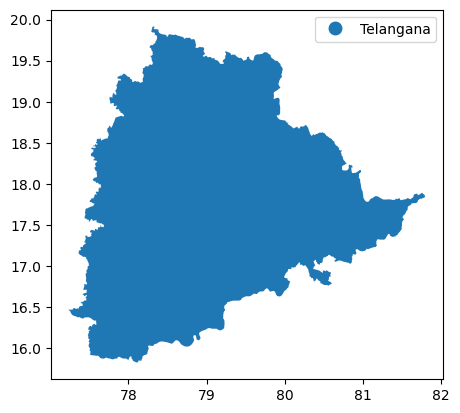

In [20]:
data.plot(column='NAME_1', legend=True)
plt.show()

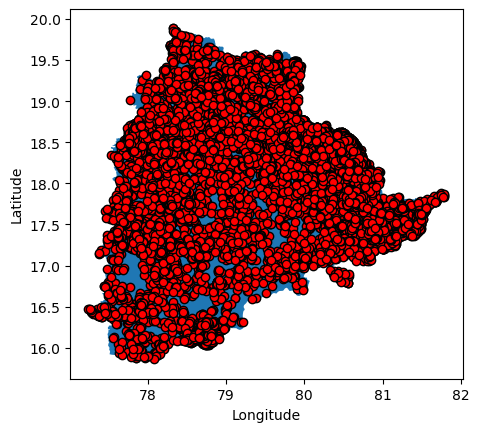

In [21]:
data.plot()
plt.scatter(fires_data.longitude, fires_data.latitude, c='red', edgecolor = 'black')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

In [22]:
fires_data['geometry'] = fires_data.apply(lambda x: Point((x.longitude, x.latitude)), axis=1)
fires_data.head()

,fireID,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_t31,frp,daynight,type,geometry
0,0,18.3777,80.5314,318.6,1.0,1.0,02/01/15,802,Aqua,MODIS,69,6.03,302.6,7.7,D,0,POINT (80.5314 18.3777)
1,1,17.5898,80.9893,315.4,1.2,1.1,04/01/15,750,Aqua,MODIS,59,6.03,299.5,8.8,D,0,POINT (80.9893 17.5898)
2,2,17.6028,81.1612,311.8,1.2,1.1,05/01/15,527,Terra,MODIS,46,6.03,299.8,6.0,D,0,POINT (81.16119999999999 17.6028)
3,3,17.5241,80.3135,317.0,1.1,1.0,05/01/15,527,Terra,MODIS,69,6.03,302.0,9.3,D,0,POINT (80.3135 17.5241)
4,4,17.7571,80.3404,317.2,2.5,1.5,05/01/15,833,Aqua,MODIS,53,6.03,300.0,29.3,D,0,POINT (80.3404 17.7571)


In [23]:
fires_data_crs = {'init': 'epsg:4326'}
fires_data_geo = gpd.GeoDataFrame(fires_data, crs = fires_data_crs, geometry = fires_data.geometry)
fires_data_geo.head(3)

c:\Users\Jesse\Anaconda3\envs\gurobi\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


,fireID,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_t31,frp,daynight,type,geometry
0,0,18.3777,80.5314,318.6,1.0,1.0,02/01/15,802,Aqua,MODIS,69,6.03,302.6,7.7,D,0,POINT (80.53140 18.37770)
1,1,17.5898,80.9893,315.4,1.2,1.1,04/01/15,750,Aqua,MODIS,59,6.03,299.5,8.8,D,0,POINT (80.98930 17.58980)
2,2,17.6028,81.1612,311.8,1.2,1.1,05/01/15,527,Terra,MODIS,46,6.03,299.8,6.0,D,0,POINT (81.16120 17.60280)


In [24]:
#Convert geometry from decimal degrees to meters
fires_data_geo.geometry = fires_data_geo.geometry.to_crs(epsg = 3857)
fires_data_geo.head()

,fireID,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_t31,frp,daynight,type,geometry
0,0,18.3777,80.5314,318.6,1.0,1.0,02/01/15,802,Aqua,MODIS,69,6.03,302.6,7.7,D,0,POINT (8964714.441 2081805.399)
1,1,17.5898,80.9893,315.4,1.2,1.1,04/01/15,750,Aqua,MODIS,59,6.03,299.5,8.8,D,0,POINT (9015687.636 1989590.706)
2,2,17.6028,81.1612,311.8,1.2,1.1,05/01/15,527,Terra,MODIS,46,6.03,299.8,6.0,D,0,POINT (9034823.456 1991108.895)
3,3,17.5241,80.3135,317.0,1.1,1.0,05/01/15,527,Terra,MODIS,69,6.03,302.0,9.3,D,0,POINT (8940457.924 1981919.680)
4,4,17.7571,80.3404,317.2,2.5,1.5,05/01/15,833,Aqua,MODIS,53,6.03,300.0,29.3,D,0,POINT (8943452.418 2009137.006)


In [25]:
#Interested arguments:
# gpdsjoin( op = 'contains' 'within' or 'intersects') & within_gdf.shape[0]) 

In [35]:
#Centroid:
print(data.geometry[0].area)
data_m = data.geometry.to_crs(epsg = 3857)
print(data_m.geometry[0].area/10000, 'squared km')

#Distances:
fire1 = fires_data.geometry[0]
fire2 = fires_data.geometry[1]
print(fire1.distance(other = fire2))

9.776575599803248
12725871.592905205 squared km
0.9112951333130207


In [45]:
fire_map = folium.Map(location = [fires_data['latitude'].iloc[0], fires_data['longitude'].iloc[0]], zoom_start = 5)
folium.GeoJson(data.geometry).add_to(fire_map)
popup = '<strong> Fire 1 </strong>'
marker = folium.Marker(location = [fires_data['latitude'].iloc[0], fires_data['longitude'].iloc[0]], popup = popup)
marker.add_to(fire_map)
display(fire_map)

In [49]:

os.chdir('c:\\Users\\Jesse\\OneDrive\\Documenten\\Master BAOR\\Thesis\\GitHub\\dicra\\src\\data_preprocessing\\tsdm\\')
data2 = gpd.read_file('District_Boundary.shp')
data3 = gpd.read_file('Mandal_Boundary.shp')

data2.head(3)

,Area,Shape_Leng,Shape_Area,No_HH,TOT_P,TOT_M,TOT_F,P_06,M_06,F_06,P_SC,M_SC,F_SC,P_ST,M_ST,F_ST,Dist_Name,geometry
0,6974.142517,5.810776,697414.251698,279190.0,1115724.0,555120.0,560601.0,107326.0,54647.0,52676.0,143482.0,71281.0,72201.0,392034.0,194349.0,197683.0,Bhadradri Kothagudem,"POLYGON ((80.85065 17.61530, 80.85098 17.61340..."
1,2853.088839,2.739430,285308.883913,253619.0,985417.0,484079.0,501338.0,93272.0,47890.0,45382.0,164596.0,80254.0,84342.0,23351.0,11562.0,11789.0,Jagtial,"POLYGON ((78.98890 19.07410, 78.99074 19.07366..."
2,2112.708002,2.828196,211270.800170,131395.0,534991.0,267875.0,267116.0,52085.0,26914.0,25171.0,112256.0,56347.0,55909.0,62224.0,31570.0,30654.0,Jangoan,"POLYGON ((79.19052 17.99939, 79.19058 17.99938..."


<ipython-input-67-fc36d19adfc5>:7: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  new_geo['area'] = new_geo.geometry.area


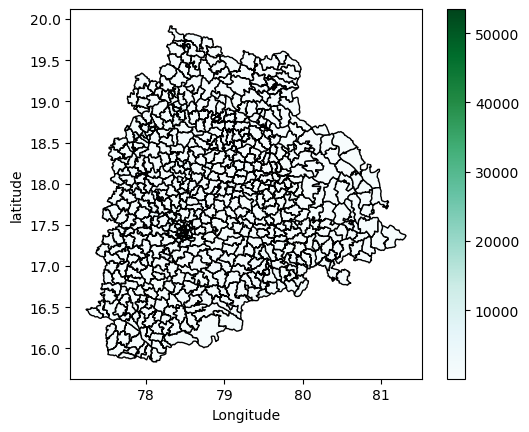

In [67]:
#Choropleth
#gpd.GeoDataFrame(, crs = , geometry = )

mandal_counts= data3.groupby(['Dist_Name']).size()
mandal_counts_df = mandal_counts.to_frame()
mandal_counts_df = mandal_counts_df.reset_index()
mandal_counts_df.columns = ['Dist_Name', 'Amount of Mandals']

new_geo = pd.merge(data3, mandal_counts_df, on = 'Dist_Name')
new_geo['area'] = new_geo.geometry.area
new_geo['normalized value'] = new_geo.apply(lambda row: row['Amount of Mandals']/row['area'], axis = 1)

new_geo.plot(column = 'normalized value', cmap = 'BuGn', edgecolor = 'black', legend = True)
plt.xlabel('Longitude')
plt.ylabel('latitude')
plt.show()